In [134]:
!pip install --quiet pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Challenge - IOT, IOB, GENERATIVE IA

Nessa solução do challenge, o Digital Cop, é uma IA que prediz um paciente ou um dentista que é suspeito de fraude. 

### Análise de dados

Criamos um dataset fictício apenas para representar nossa solução. 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Carregando o dataset
df = pd.read_csv('dataset_fraude_plano_saude_dentario.csv')

In [137]:
df.head()

,ID_Cliente,Num_Procedimentos,Valor_Total,Consultas_Nao_Realizadas,Procedimentos_Esteticos,Uso_Por_Terceiros,Diferenca_Valor,Historico_Fraude,Fraude
0,1001,7,3744.532188,0,0,0,12.383999,0,0
1,1002,19,5467.922252,5,2,0,799.103083,0,1
2,1003,13,7837.062690,0,0,0,37.364668,1,0
3,1004,7,24.382687,0,1,0,132.068728,0,0
4,1005,16,7553.930772,0,0,0,-0.800403,0,0


In [138]:
# A fraude esta definida entre 0 e 1, sendo 1 um possivel suspeito
df['Fraude'].value_counts()

Fraude
0    900
1    100
Name: count, dtype: int64

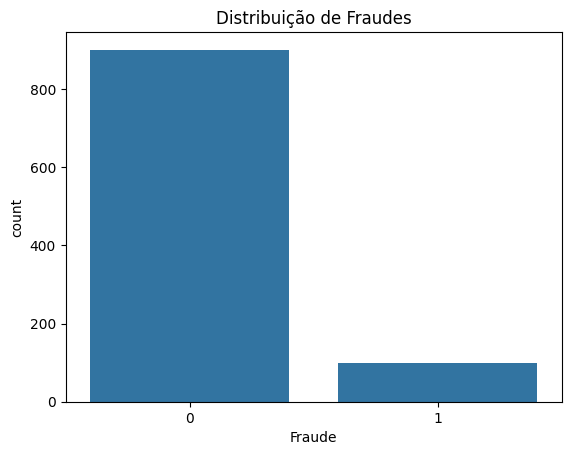

In [139]:
sns.countplot(x='Fraude', data=df)
plt.title("Distribuição de Fraudes")
plt.show()

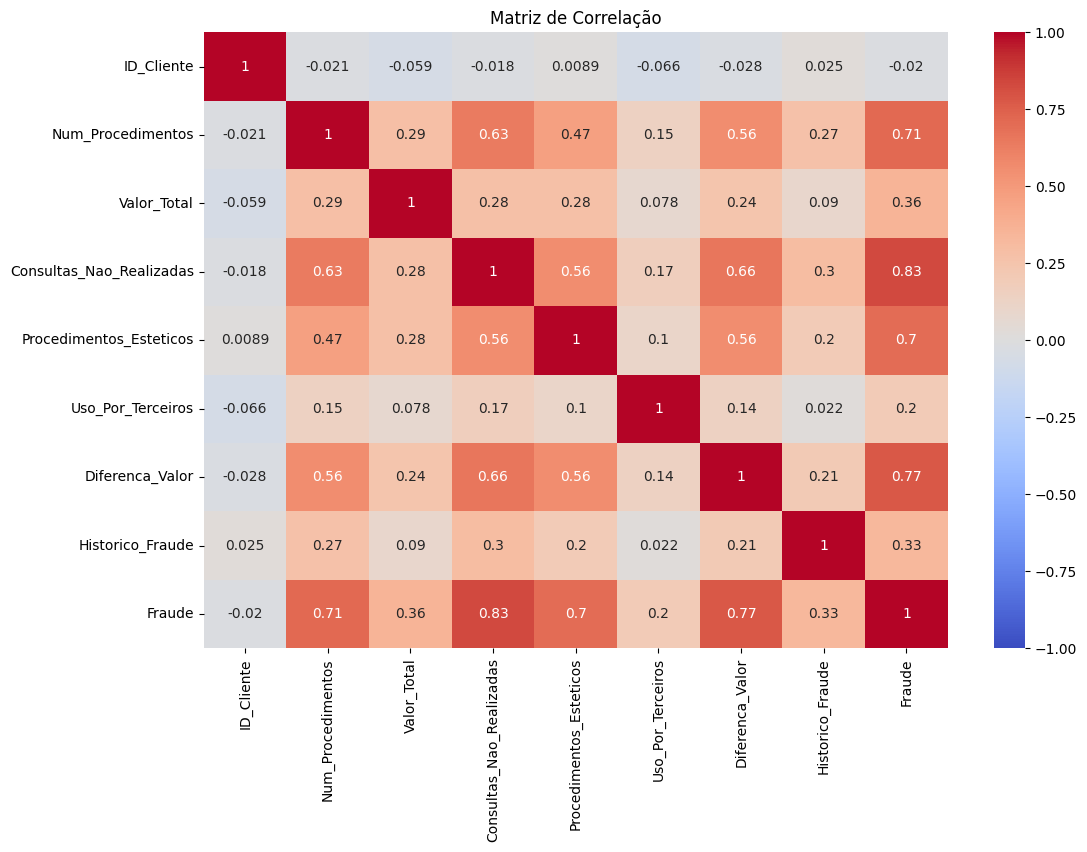

In [140]:
# Matriz de correlacao entre as variaveis

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

A partir dessa matriz de correlação podemos perceber alguns padrões
- Consultas não realizadas tem uma alta correlação com fraude, o que sugere que os pacientes que marcam as consultas e não vão combinado com outros fatores podem ser potenciais suspeitos.
- Numero de procedimentos também tem uma alta correlação, isso indica que pacientes que realizam muitos procedimentos podem estar abusando disso, ainda mais se forem de alto valor.
- Diferenca de valor, a diferenca entre o valor cobrado e o valor de mercado mostra que os pacientes podem estar envolvidos em cobranças excessivas ou procedimentos superfaturados
- Procedimentos estéticos, na teoria são menos necessários nos termos de saúde, se um paciente busca muitos procedimentos esteticos podem estar tentando cometar algum tipo de fraude e tentando tirar vantagem do plano de saúde.

### Treinando o modelo


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [142]:
# Tirando colunas que não vão ser utilizadas e a coluna alvo
X = df.drop(columns=['ID_Cliente', 'Fraude']) 
y = df['Fraude']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [144]:
model = RandomForestClassifier()

In [145]:
model.fit(X_train, y_train)


RandomForestClassifier()

In [146]:
y_pred = model.predict(X_test)


In [151]:
# Avaliação do modelo
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nAcurácia do modelo:")
accuracy_score(y_test, y_pred)


Matriz de Confusão:
[[271   0]
 [  1  28]]

Acurácia do modelo:


0.9966666666666667